In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
accts = pd.read_csv("ZayoHackathonData_Accounts.csv")
cpqs = pd.read_csv("ZayoHackathonData_CPQs.csv")
opps = pd.read_csv("ZayoHackathonData_Opportunities.csv")
svcs = pd.read_csv("ZayoHackathonData_Services.csv")
sts = pd.read_csv("ZayoHackathonData_Sites.csv")

In [58]:
#opps.head()
np.unique(opps['StageName'])

array(['1 - Working', '2 - Best Case', '3 - Committed', '4 - Closed',
       '5 - Accepted', 'Closed - Lost'], dtype=object)

In [32]:
# Add a new column corresponding to whether or not the opportunity is close to being closed
to_predict = opps[(opps["StageName"] == "1 - Working") | (opps['StageName'] ==" 2 - Best Case")]
opp = opps[(opps["StageName"] == "3 - Committed") | (opps['StageName'] == "4 - Closed") | (opps['StageName'] == "5 - Accepted") | (opps['StageName'] == "Closed - Lost")]
opp['IsCommitted'] = [row['StageName'] in ["3 - Committed", "4 - Closed", "5 - Accepted"] for i, row in opp.iterrows()]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [33]:
opp.columns

Index([u'﻿Opportunity ID', u'Account ID', u'StageName', u'IsClosed', u'IsWon',
       u'CreatedDate', u'Term in Months', u'Service', u'Opportunity Type',
       u'Product Group', u'Building ID', u'Market', u'Street Address', u'City',
       u'State', u'Postal Code', u'Network Proximity',
       u'On Zayo Network Status', u'IsCommitted'],
      dtype='object')

In [34]:
opp = opp.merge(accts, left_on = opp.columns[1], right_on = accts.columns[0], how = 'left', suffixes = ['_opp', '_accts'])
opp.columns

Index([u'﻿Opportunity ID', u'Account ID', u'StageName', u'IsClosed', u'IsWon',
       u'CreatedDate', u'Term in Months', u'Service', u'Opportunity Type',
       u'Product Group', u'Building ID', u'Market', u'Street Address', u'City',
       u'State', u'Postal Code', u'Network Proximity',
       u'On Zayo Network Status', u'IsCommitted', u'﻿Account ID', u'Industry',
       u'Vertical', u' Total BRR ', u' AnnualRevenue ', u'NumberOfEmployees',
       u' DandB Revenue ', u'DandB Total Employees'],
      dtype='object')

In [35]:
opp = opp.merge(cpqs, left_on = opp.columns[1], right_on = cpqs.columns[1], how = 'left', suffixes = ['_opp', '_cpqs'])
opp.columns

Index([u'﻿Opportunity ID', u'Account ID', u'StageName', u'IsClosed', u'IsWon',
       u'CreatedDate_opp', u'Term in Months', u'Service', u'Opportunity Type',
       u'Product Group_opp', u'Building ID_opp', u'Market_opp',
       u'Street Address_opp', u'City_opp', u'State_opp', u'Postal Code_opp',
       u'Network Proximity_opp', u'On Zayo Network Status_opp', u'IsCommitted',
       u'﻿Account ID', u'Industry', u'Vertical', u' Total BRR ',
       u' AnnualRevenue ', u'NumberOfEmployees', u' DandB Revenue ',
       u'DandB Total Employees', u'﻿CPQ ID', u'CreatedDate_cpqs',
       u'Product Group_cpqs', u' X36 MRC List ', u' X36 NRR List ',
       u' X36 NPV List ', u'Building ID_cpqs', u'Market_cpqs',
       u'Street Address_cpqs', u'City_cpqs', u'State_cpqs',
       u'Postal Code_cpqs', u'Network Proximity_cpqs',
       u'On Zayo Network Status_cpqs'],
      dtype='object')

In [8]:
#opp = opp.merge(sts, left_on = opp.columns[1], right_on = sts.columns[1], how = 'left')
#opp.columns

## Data Preprocessing

In [37]:
opp_filtered = opp.drop([cpqs.columns[0], '﻿Opportunity ID', 'Account ID', '﻿Account ID', 'StageName', 'IsClosed', 'IsWon', 'Building ID_opp', 'Building ID_cpqs', 'Street Address_opp', 'Street Address_cpqs'], axis=1)

In [38]:
opp_filtered.columns

Index([u'CreatedDate_opp', u'Term in Months', u'Service', u'Opportunity Type',
       u'Product Group_opp', u'Market_opp', u'City_opp', u'State_opp',
       u'Postal Code_opp', u'Network Proximity_opp',
       u'On Zayo Network Status_opp', u'IsCommitted', u'Industry', u'Vertical',
       u' Total BRR ', u' AnnualRevenue ', u'NumberOfEmployees',
       u' DandB Revenue ', u'DandB Total Employees', u'CreatedDate_cpqs',
       u'Product Group_cpqs', u' X36 MRC List ', u' X36 NRR List ',
       u' X36 NPV List ', u'Market_cpqs', u'City_cpqs', u'State_cpqs',
       u'Postal Code_cpqs', u'Network Proximity_cpqs',
       u'On Zayo Network Status_cpqs'],
      dtype='object')

In [41]:
#features = [u'CreatedDate_opp', u'Term in Months', u'Service', u'Opportunity Type', u'Product Group_opp', u'Market_opp', u'City_opp', u'State_opp', u'Postal Code_opp', u'Network Proximity_opp', u'On Zayo Network Status_opp', u'Industry', u'Vertical', u' Total BRR ', u' AnnualRevenue ', u'NumberOfEmployees', u' DandB Revenue ', u'DandB Total Employees', ]
features = opp_filtered.columns - [u'IsCommitted']
prediction = [u'IsCommitted']

opp_filtered[features].head()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  from ipykernel import kernelapp as app


,AnnualRevenue,DandB Revenue,Total BRR,X36 MRC List,X36 NPV List,X36 NRR List,City_cpqs,City_opp,CreatedDate_cpqs,CreatedDate_opp,...,Opportunity Type,Postal Code_cpqs,Postal Code_opp,Product Group_cpqs,Product Group_opp,Service,State_cpqs,State_opp,Term in Months,Vertical
0,$-,$-,"$1,334,080.00",$666.15,"$11,560.17",$-,Atlanta,Atlanta,10/4/16,7/1/16,...,New Service,30303,30303,Ethernet,Ethernet,NaN,GA,GA,12.0,PTT
1,$-,$-,"$1,334,080.00",$666.15,"$11,560.17",$-,Atlanta,Atlanta,10/4/16,7/1/16,...,New Service,30339,30303,Ethernet,Ethernet,NaN,GA,GA,12.0,PTT
2,$-,$-,"$1,334,080.00","$1,761.66","$12,843.38",$922.00,Atlanta,Atlanta,10/4/16,7/1/16,...,New Service,30339,30303,Ethernet,Ethernet,NaN,GA,GA,12.0,PTT
3,$-,$-,"$1,334,080.00",$993.93,"$16,611.38",$922.00,Alpharetta,Atlanta,10/4/16,7/1/16,...,New Service,30004,30303,Ethernet,Ethernet,NaN,GA,GA,12.0,PTT
4,$-,$-,"$1,334,080.00",$993.93,"$16,611.38",$922.00,Atlanta,Atlanta,10/4/16,7/1/16,...,New Service,30339,30303,Ethernet,Ethernet,NaN,GA,GA,12.0,PTT


In [43]:
from sklearn import preprocessing

# Sklearn's decision trees do not like features which are strings. We need 
# to convert any features which are strings into numerical values. We'll use
# Sklearn's built in label encoding. We'll store these encoders for our 
# understanding later.

le = {}

for feature in features:
    print feature
    if opp_filtered[feature].dtype == np.float64 or opp_filtered[feature].dtype == np.int64:
        opp_filtered[feature] = opp_filtered[feature].replace(np.nan, 0, regex=True)
        continue
    #print feature
    opp_filtered[feature] = opp_filtered[feature].replace(np.nan, u'NaN', regex=True)
    
    le[feature] = preprocessing.LabelEncoder()
    le[feature].fit(opp_filtered[feature])
    #print le[feature].classes_

    opp_filtered[feature] = [le[feature].transform([row])[0] for row in opp_filtered[feature]]        

 AnnualRevenue 
 DandB Revenue 
 Total BRR 
 X36 MRC List 
 X36 NPV List 
 X36 NRR List 
City_cpqs
City_opp
CreatedDate_cpqs
CreatedDate_opp
DandB Total Employees
Industry
Market_cpqs
Market_opp
Network Proximity_cpqs
Network Proximity_opp
NumberOfEmployees
On Zayo Network Status_cpqs
On Zayo Network Status_opp
Opportunity Type
Postal Code_cpqs
Postal Code_opp
Product Group_cpqs
Product Group_opp
Service
State_cpqs
State_opp
Term in Months
Vertical


In [45]:
opp_filtered.to_csv("opp_training_data.csv", sep =",")
opp_filtered.head()

,CreatedDate_opp,Term in Months,Service,Opportunity Type,Product Group_opp,Market_opp,City_opp,State_opp,Postal Code_opp,Network Proximity_opp,...,Product Group_cpqs,X36 MRC List,X36 NRR List,X36 NPV List,Market_cpqs,City_cpqs,State_cpqs,Postal Code_cpqs,Network Proximity_cpqs,On Zayo Network Status_cpqs
0,149,12.0,0,4,2,0,8,1,30303,66.45,...,2,4098,0,305,0,5,1,29,1055.22,3
1,149,12.0,0,4,2,0,8,1,30303,66.45,...,2,4098,0,305,0,5,1,54,93.75,3
2,149,12.0,0,4,2,0,8,1,30303,66.45,...,2,1240,192,541,0,5,1,54,93.75,3
3,149,12.0,0,4,2,0,8,1,30303,66.45,...,2,4786,192,1234,0,2,1,0,91.05,3
4,149,12.0,0,4,2,0,8,1,30303,66.45,...,2,4786,192,1234,0,5,1,54,93.75,3


In [46]:
le.keys()

['State_opp',
 'State_cpqs',
 'Service',
 'Product Group_cpqs',
 'CreatedDate_opp',
 'On Zayo Network Status_opp',
 ' Total BRR ',
 ' X36 MRC List ',
 'Vertical',
 'Market_opp',
 'CreatedDate_cpqs',
 'Market_cpqs',
 'City_opp',
 'City_cpqs',
 'Industry',
 'Postal Code_cpqs',
 'Product Group_opp',
 ' X36 NPV List ',
 ' AnnualRevenue ',
 'On Zayo Network Status_cpqs',
 'Opportunity Type',
 ' DandB Revenue ',
 ' X36 NRR List ']

## Build a Decision Tree

In [47]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(opp_filtered[features].values, opp_filtered[prediction].values)

In [75]:
"""
from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())
"""

'\nfrom IPython.display import Image  \nimport pydotplus\ndot_data = tree.export_graphviz(clf, out_file=None,  \n                         filled=True, rounded=True,  \n                         special_characters=True)  \ngraph = pydotplus.graph_from_dot_data(dot_data)  \nImage(graph.create_png())\n'

## Check Accuracy Using Holdout Set

In [50]:
# If we were really fancy we'd do a K-Folds test, but I'm
# feeling kind of lazy, so I'll just train on the first 4/5ths
# and test on the last 1/5th of data.

clf = tree.DecisionTreeClassifier()
fraction = 4.0/5.0
shuffled = opp_filtered.sample(frac=1)
trainX = shuffled[features][:int(round(fraction*len(shuffled)))].values
trainY = shuffled[prediction][:int(round(fraction*len(shuffled)))].values

clf = clf.fit(trainX, trainY)

testX = shuffled[features][int(round(fraction*len(shuffled))):].values
testY = shuffled[prediction][int(round(fraction*len(shuffled))):].values

print(clf.score(testX, testY))

0.998267273121


## Build a Random Forest

In [55]:
# Decision trees can be prone to overfitting. Let's use a
# random forest (a bunch of decision trees trained on 
# sub-samples of the data).

from sklearn import ensemble

clf = ensemble.RandomForestClassifier()
fraction = 4.0/5.0
shuffled = opp_filtered.sample(frac=1)

features = features.difference(['Created Date', 'CreatedDate_opp'])
trainX = shuffled[features][:int(round(fraction*len(shuffled)))].values
trainY = shuffled[prediction][:int(round(fraction*len(shuffled)))].values

clf = clf.fit(trainX, trainY)

testX = shuffled[features][int(round(fraction*len(shuffled))):].values
testY = shuffled[prediction][int(round(fraction*len(shuffled))):].values

print(clf.score(testX, testY))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.966552182926


Feature ranking:
1.	feature 26	(0.306385, Term in Months)
2.	feature 2	(0.099370, Total BRR)
3.	feature 22	(0.079545, Product Group_opp)
4.	feature 14	(0.070856, Network Proximity_opp)
5.	feature 10	(0.070746, Industry)
6.	feature 27	(0.061491, Vertical)
7.	feature 20	(0.052337, Postal Code_opp)
8.	feature 0	(0.037708, AnnualRevenue)
9.	feature 15	(0.034917, NumberOfEmployees)
10.	feature 1	(0.031996, DandB Revenue)
11.	feature 17	(0.030821, On Zayo Network Status_opp)
12.	feature 9	(0.027275, DandB Total Employees)
13.	feature 7	(0.021490, City_opp)
14.	feature 25	(0.013258, State_opp)
15.	feature 12	(0.011840, Market_opp)
16.	feature 8	(0.009531, CreatedDate_cpqs)
17.	feature 3	(0.007654, X36 MRC List)
18.	feature 4	(0.006815, X36 NPV List)
19.	feature 13	(0.006229, Network Proximity_cpqs)
20.	feature 5	(0.003950, X36 NRR List)
21.	feature 19	(0.003760, Postal Code_cpqs)
22.	feature 23	(0.002520, Service)
23.	feature 6	(0.002209, City_cpqs)
24.	feature 21	(0.002114, Product Group_cpq

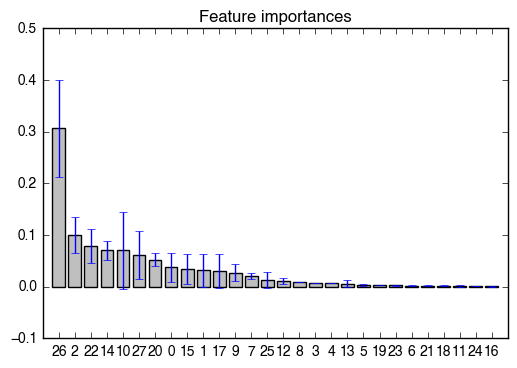

In [56]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(opp_filtered[features].shape[1]):
    print("%d.\tfeature %d\t(%f, %s)" % (f + 1, indices[f], importances[indices[f]], opp_filtered[features].columns[indices[f]].strip()))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(opp_filtered[features].shape[1]), importances[indices],
    color = '0.75', yerr=std[indices], align="center")
plt.xticks(range(opp_filtered[features].shape[1]), indices)
plt.xlim([-1, opp_filtered[features].shape[1]])
plt.show()